# Machine Learning - Formação Cientista de dados
### Árvore de decisão usando o RPart

In [1]:
#instalar o pacote Rpart com dependencias
install.packages("rpart", dependencies=T)

Installing package into 'C:/Users/dmiyake/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"unable to move temporary installation 'C:\Users\dmiyake\Documents\R\win-library\3.4\file38641ff6765d\rpart' to 'C:\Users\dmiyake\Documents\R\win-library\3.4\rpart'"


The downloaded binary packages are in
	C:\Users\dmiyake\AppData\Local\Temp\RtmpmwvC3x\downloaded_packages


In [2]:
library(rpart)

In [4]:
credito = read.csv(file.choose(), sep = ",", header = T) #usar o arquivo credit.csv

In [5]:
credito

checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [6]:
#gerando a amostra e os dados de treino
amostra = sample(2,1000,replace=T, prob= c(0.7,0.3))

In [7]:
creditotreino = credito[amostra==1,]

In [8]:
creditoteste = credito[amostra==2,]

In [9]:
arvore = rpart(class ~. ,data = creditotreino, method="class") #geração da arvore de decisão

In [10]:
print(arvore)

n= 720 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 720 210 good (0.29166667 0.70833333)  
    2) checking_status=<0,0<=X<200 378 163 good (0.43121693 0.56878307)  
      4) duration>=11.5 321 153 good (0.47663551 0.52336449)  
        8) savings_status=<100,100<=X<500,500<=X<1000 266 125 bad (0.53007519 0.46992481)  
         16) duration>=43.5 35   6 bad (0.82857143 0.17142857) *
         17) duration< 43.5 231 112 good (0.48484848 0.51515152)  
           34) other_parties='co applicant',none 211 101 bad (0.52132701 0.47867299)  
             68) purpose='domestic appliance','new car',education,furniture/equipment,radio/tv,repairs 161  67 bad (0.58385093 0.41614907)  
              136) credit_amount< 1398 41   9 bad (0.78048780 0.21951220) *
              137) credit_amount>=1398 120  58 bad (0.51666667 0.48333333)  
                274) credit_history='all paid','delayed previously','no credits/all paid' 30   8 bad (0.73333333 0.26666667) *
     

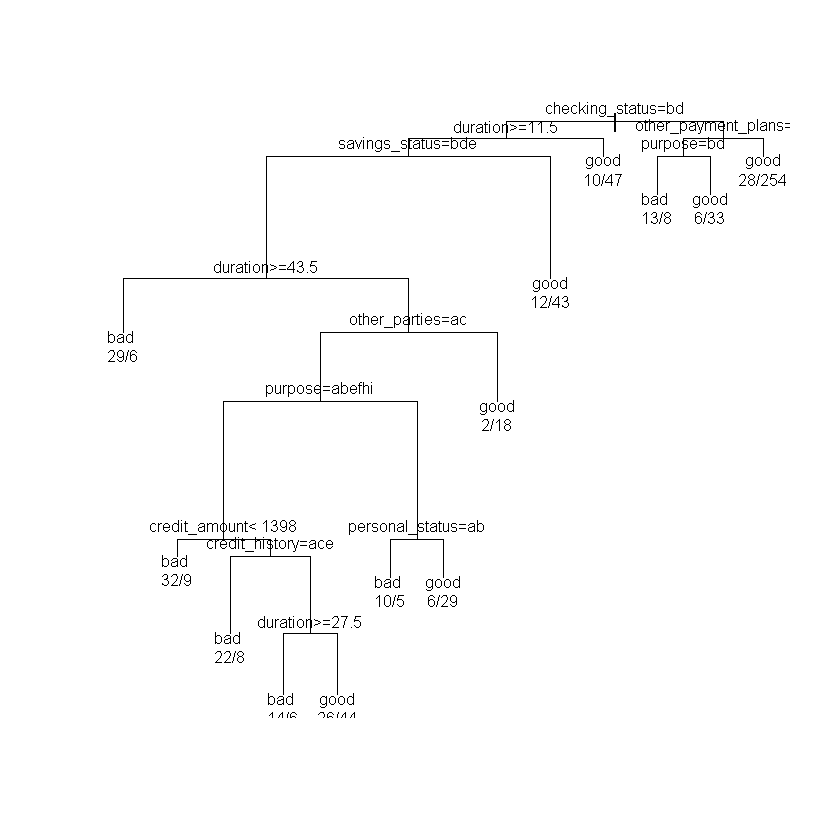

In [13]:
plot (arvore)
text(arvore, use.n=T, cex=.8)

In [14]:
teste = predict (arvore, newdata = creditoteste)

In [15]:
teste #verificação da probabilidade de predição de ser bom ou mal pagador

,bad,good
2,0.82857143,0.1714286
3,0.09929078,0.9007092
15,0.37142857,0.6285714
20,0.09929078,0.9007092
21,0.09929078,0.9007092
27,0.09929078,0.9007092
28,0.09929078,0.9007092
42,0.78048780,0.2195122
43,0.73333333,0.2666667
44,0.17142857,0.8285714


In [17]:
#transformar em binário para saber se é bom ou mal
cred = cbind(creditoteste, teste)
fix(cred)

In [18]:
#Criar uma coluna result que captura os dados se é bom ou mal pagador e a preenche com 1 ou 2
cred['Result'] = ifelse(cred$bad >= 0.5 , "bad", "good")

In [19]:
fix(cred)

In [20]:
#medindo a taxa de acerto com a matriz de confusão
confusao = table(cred$class, cred$Result)
confusao

      
       bad good
  bad   36   54
  good  25  165

In [26]:
taxaacerto = ((confusao[1] + confusao[4]) / sum(confusao))
taxaacerto # taxa de acerto do modelo

[1] 0.7178571

In [25]:
taxaerro = ((confusao[2] + confusao[3]) / sum(confusao))
taxaerro

[1] 0.2821429

# FIM